In [1]:
# pip install pandas_datareader

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader as data 

D:\Softwares\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# pip install yfinance --user

In [4]:
import yfinance as yf
data = yf.download('MSFT', start = '2010-01-01', end='2019-12-31')

[*********************100%%**********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.522568,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.530163,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.385763,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.142561,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.302155,51197400


In [6]:
data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.522568,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.530163,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.385763,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.142561,50559700
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.302155,51197400


In [7]:
data = data.copy()
data = data.drop(['Date', 'Adj Close'], axis= 1)
data.head()

,Open,High,Low,Close,Volume
0,30.620001,31.100000,30.590000,30.950001,38409100
1,30.850000,31.100000,30.639999,30.959999,49749600
2,30.879999,31.080000,30.520000,30.770000,58182400
3,30.629999,30.700001,30.190001,30.450001,50559700
4,30.280001,30.879999,30.240000,30.660000,51197400


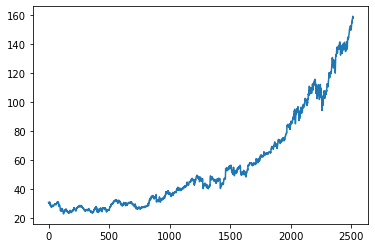

In [8]:
plt.plot(data.Close)

In [9]:
ma100 = data.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2510    142.3618
2511    142.5666
2512    142.8312
2513    143.0739
2514    143.2970
Name: Close, Length: 2515, dtype: float64

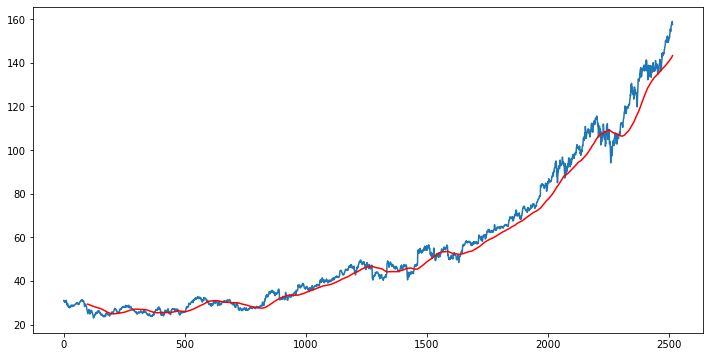

In [10]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    135.23265
2511    135.45145
2512    135.67230
2513    135.89415
2514    136.10255
Name: Close, Length: 2515, dtype: float64

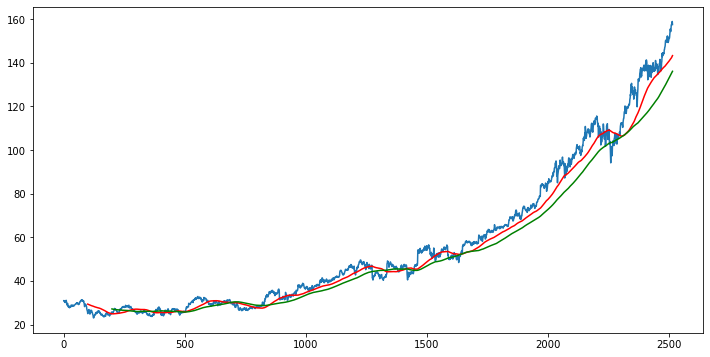

In [12]:

plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
data.shape

(2515, 5)

In [14]:
type(data)

pandas.core.frame.DataFrame

In [15]:
# Splitting Data into training and testing

data_training = data['Close'][0:int(len(data) * 0.70)]
data_testing = data['Close'][int(len(data) * 0.70):]

print(data_training.shape)
print(data_testing.shape)


(1760,)
(755,)


In [16]:
data_training.head()

0    30.950001
1    30.959999
2    30.770000
3    30.450001
4    30.660000
Name: Close, dtype: float64

In [17]:
data_testing.head()

1760    62.900002
1761    62.139999
1762    62.580002
1763    62.299999
1764    62.299999
Name: Close, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Reshape the data_training array
data_training_array = scaler.fit_transform(data_training.values.reshape(-1, 1))

# Print the scaled data
print(data_training_array)


[[0.19551836]
 [0.19576457]
 [0.19108595]
 ...
 [0.99064277]
 [0.99162767]
 [0.98448665]]


In [20]:
data_training_array.shape

(1760, 1)

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)


In [22]:
x_train.shape

(1660, 100, 1)

In [23]:
# pip install numpy==1.21


In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [25]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences= True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 12s 151ms/step - loss: 0.0485
Epoch 2/50
52/52 [==============================] - 8s 156ms/step - loss: 0.0082
Epoch 3/50
52/52 [==============================] - 8s 155ms/step - loss: 0.0090
Epoch 4/50
52/52 [==============================] - 8s 150ms/step - loss: 0.0073
Epoch 5/50
52/52 [==============================] - 8s 146ms/step - loss: 0.0069
Epoch 6/50
52/52 [==============================] - 7s 144ms/step - loss: 0.0062
Epoch 7/50
52/52 [==============================] - 7s 143ms/step - loss: 0.0058
Epoch 8/50
52/52 [==============================] - 7s 143ms/step - loss: 0.0049
Epoch 9/50
52/52 [==============================] - 7s 144ms/step - loss: 0.0050
Epoch 10/50
52/52 [==============================] - 7s 144ms/step - loss: 0.0054
Epoch 11/50
52/52 [==============================] - 7s 142ms/step - loss: 0.0056
Epoch 12/50
52/52 [==============================] - 7s 144ms/step - loss: 0.0048
Epoch 13/50
52/52 [=====

In [28]:
model.save('keras_model.h5')

In [29]:
data_testing.head()

1760    62.900002
1761    62.139999
1762    62.580002
1763    62.299999
1764    62.299999
Name: Close, dtype: float64

In [30]:
data_training.tail(100)

1660    58.060001
1661    58.200001
1662    58.020000
1663    58.299999
1664    57.939999
          ...    
1755    63.540001
1756    63.549999
1757    63.240002
1758    63.279999
1759    62.990002
Name: Close, Length: 100, dtype: float64

In [31]:
past_100_days = data_training.tail(100)

In [37]:
final_df = past_100_days._append(data_testing, ignore_index= True)

In [38]:
input_data = scaler.fit_transform(final_df.values.reshape(-1, 1))
input_data


array([[1.80048871e-02],
       [1.93674115e-02],
       [1.76155838e-02],
       [2.03406326e-02],
       [1.68369773e-02],
       [1.85888049e-02],
       [1.19707976e-02],
       [1.31387074e-02],
       [1.35279736e-02],
       [1.37226252e-02],
       [1.42092358e-02],
       [1.63503667e-02],
       [1.69343216e-02],
       [1.90754155e-02],
       [1.77128911e-02],
       [1.83941533e-02],
       [1.63503667e-02],
       [1.21654492e-02],
       [1.34306663e-02],
       [1.42092358e-02],
       [1.36253180e-02],
       [1.41119285e-02],
       [1.18734903e-02],
       [0.00000000e+00],
       [8.17518336e-03],
       [3.11435203e-03],
       [4.86610544e-04],
       [9.53770773e-03],
       [1.01216627e-02],
       [7.00731063e-03],
       [5.83943790e-03],
       [1.50851496e-02],
       [1.56691045e-02],
       [1.18734903e-02],
       [6.71535173e-03],
       [1.69343216e-02],
       [1.77128911e-02],
       [1.15815314e-02],
       [1.35279736e-02],
       [1.17761459e-02],


In [39]:
input_data.shape

(855, 1)

In [41]:
x_test =[]
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [42]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [43]:
#making Predictions
y_predicted = model.predict(x_test)

In [44]:
y_predicted.shape

(755, 1)

In [45]:
y_test

array([0.06510951, 0.05771289, 0.06199516, 0.05927007, 0.05927007,
       0.06452555, 0.06257907, 0.06238442, 0.06793186, 0.06228711,
       0.06316303, 0.06150851, 0.06121655, 0.05927007, 0.06355233,
       0.06569343, 0.07114356, 0.07270074, 0.07844279, 0.09313868,
       0.08681263, 0.08214114, 0.07172752, 0.06773721, 0.07270074,
       0.07231143, 0.07026765, 0.06939173, 0.07639901, 0.07581509,
       0.0828224 , 0.08136253, 0.08097323, 0.08087588, 0.08184918,
       0.08058392, 0.07931874, 0.08184918, 0.08184918, 0.07805356,
       0.07562044, 0.08496353, 0.07591243, 0.07824818, 0.07844279,
       0.07970805, 0.0854501 , 0.08291974, 0.08486619, 0.08272505,
       0.07980539, 0.08311436, 0.08204379, 0.08428227, 0.08486619,
       0.07785887, 0.08583941, 0.08428227, 0.08535283, 0.08652067,
       0.08836984, 0.09012167, 0.09245741, 0.09391728, 0.09090028,
       0.0926521 , 0.09099755, 0.0926521 , 0.09216546, 0.09070559,
       0.09021901, 0.08778592, 0.0850608 , 0.09021901, 0.08934

In [46]:
y_predicted

array([[0.1101269 ],
       [0.11028078],
       [0.10993746],
       [0.10915951],
       [0.10804901],
       [0.10673821],
       [0.10543063],
       [0.10428348],
       [0.10338968],
       [0.10284725],
       [0.10264164],
       [0.10270682],
       [0.10294265],
       [0.1032443 ],
       [0.10350615],
       [0.10370122],
       [0.10386454],
       [0.10409877],
       [0.10450394],
       [0.10519032],
       [0.10637157],
       [0.1080981 ],
       [0.11022668],
       [0.11241093],
       [0.11424653],
       [0.11548439],
       [0.11602017],
       [0.11585529],
       [0.11508732],
       [0.11397733],
       [0.1127941 ],
       [0.11183316],
       [0.11127898],
       [0.11119203],
       [0.11153829],
       [0.11223367],
       [0.11314648],
       [0.11411974],
       [0.11504501],
       [0.11584988],
       [0.11644399],
       [0.11673915],
       [0.11681773],
       [0.11668907],
       [0.11639079],
       [0.11598265],
       [0.11554328],
       [0.115

In [47]:
scaler.scale_

array([0.00973236])

In [48]:
scale_factor = 1/0.04286327
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

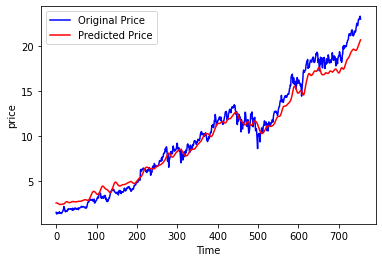

In [49]:
plt.Figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()